## Telecom churn case study 

    - Using multivariant logistic regression 
    - Datasets are available in Datasets folder

### Steps:
    1. Data Preparation 
        a. Importing and Merging Data
        b. Inspecting the merged dataframe
        c. Data Preparation
        d. Checking Outliers
        e. Checking null values
    2. Train-Test split
    3. Feature Scaling
    4. Check data imbalance

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

- Dataset 1 - Churn Data

In [3]:
churn_data = pd.read_csv('datasets/churn_data.csv')

In [4]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Dataset 2 - custmomer data

In [5]:
customer_data = pd.read_csv('datasets/customer_data.csv')

In [6]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


- Dataset 3 - Internet Data

In [7]:
internet_data = pd.read_csv('datasets/internet_data.csv')

In [8]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Summary
    - Customer ID is common key between all three datasets
    - Chrun_data - It has target varibale along with other variables.
    - Customer_data - It has few details about customers, like Gender, Senior Citizen , dependents etc.
    - Internrt_data - It has all options or services customer is using.

In [9]:
# Merge all datasets to create final single dataset with all required information.
tmp_df1 = pd.merge(churn_data, customer_data, how='inner', on = 'customerID')

In [10]:
tmp_df1.head() 

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [11]:
telecom = pd.merge(tmp_df1, internet_data, how='inner', on='customerID')

In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


- telecom dataframe is consolidated dataframe with all required information.

### Inspecting merged datafram

In [13]:
telecom.shape  #It has 7043 data points with 21 features including target variable.

(7043, 21)

In [14]:
#Lets check the statistical summary of dataset.
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


- This show statistical summary of 3 columns only, as out of 21 columns, only three columns are numeric in nature. And, we know statstic work on numerical varibales only not on categorical variable.  

In [15]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


- Info shows same,i.e, tenure,  MonthlyCharges and SeniorCitizen columns are numeric.
- Also, there are no columns with null value. 

#### Data Preparation 
- Converting columns with Yes/No to 1/0 

In [16]:
#Get columns with only Yes and No as values
pd.options.display.max_columns = None
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [17]:
telecom.nunique(axis=0)

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
dtype: int64

In [18]:
#Columns with just Yes/No values
col_names = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

- Use lambda function to convert all Yes to 1 and No to 0
- Here we have not taken Senior Citizen as it is already in numeric form and Gender is Male/Female and not Yes/No

In [19]:
telecom[col_names] = telecom[col_names].apply(lambda x : x.map({'Yes': 1, 'No': 0}))

In [20]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [21]:
telecom.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
telecom.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [23]:
telecom.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

- For other categorical columns there are multiple values. 
- Hence, we will be using **Dummy Variable** method to convert categorical into Numeric

- Focus on features which has Dtypes as objects.
- Excluding feature TotalCharges for now, it should be continuos.

In [24]:
# list of features 
dummy_1 = ['Contract','PaymentMethod','InternetService','gender','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
          'TechSupport','StreamingTV','StreamingMovies']

- Writing a function to convert categorical features into numeric using get_dummies 
- Also, by not dropping first column, instead column with longest length of its name

In [25]:
def dummies_drop_maxlen_col(lst : list, df) :
    """
    ****Prashik Bansod******
    Two arguments :
        1. List of columns names
        2. Pandas dataframe
    return : A dataframe with dummy variables without longest column name
    """
    for i in lst:
        i_tmp = pd.get_dummies(df[i],prefix=i)
        final_nm = {}
        for col_nm in i_tmp.columns:
            final_nm[col_nm] = len(col_nm)
        to_drop = max(final_nm, key=lambda x : final_nm[x])
        i_tmp = i_tmp.drop([to_drop], axis = 1)
        df = pd.concat([df,i_tmp], axis=1)
    return df
        

In [26]:
telecom = dummies_drop_maxlen_col(dummy_1, telecom)

In [27]:
telecom.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_No,gender_Male,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0


In [28]:
# Drop features which we converted using get_dummies

In [29]:
telecom = telecom.drop(dummy_1, axis=1)

In [30]:
telecom.head(2)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_No,gender_Male,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0


In [31]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

- Here we see 2 columns are still of type object:
    - customerID : not required as a feature for model. It is more of as an unique identifier 
    - TotalCharges : This should be continuos, lets impect this columns and change it to float

In [32]:
# pd.to_numeric(telecom.TotalCharges) -> using this we saw at index 488, it has empty string with one space.
## replacing it with 0 
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ',0)

In [33]:
#COnvert Dtype to numeric
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [34]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [35]:
telecom.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

### Check outliers in continuous features

In [36]:
con_feat = ['tenure','MonthlyCharges','TotalCharges']

In [37]:
#Create tmp dataframe to check outliers 
tmp_df = telecom[con_feat]

In [38]:
tmp_df.head(2)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50


In [39]:
tmp_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


<AxesSubplot:>

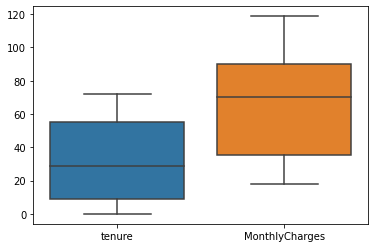

In [40]:
sns.boxplot(data=tmp_df[['tenure','MonthlyCharges']])

<AxesSubplot:xlabel='TotalCharges'>

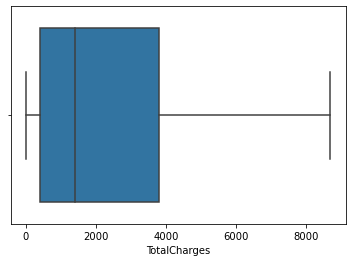

In [41]:
sns.boxplot(tmp_df.TotalCharges)

- We dont see any outliers

In [42]:
#### Handling null values 

In [43]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_DSL                      0
InternetService_No                       0
gender_Male                              0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

### Train Test Split

In [44]:
#Creating feature variables 
X = telecom.drop(['Churn','customerID'], axis=1)

In [45]:
#Creating target varible
y = telecom['Churn']

In [46]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_No,gender_Male,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [47]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [48]:
#Split data into train and test
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [49]:
X_train.shape

(4930, 30)

In [50]:
X_test.shape

(2113, 30)

In [51]:
telecom.shape

(7043, 32)

#### Feature Scaling

In [52]:
#Using StandardScalar class 
# creating object
scalar = MinMaxScaler()

In [53]:
#Standardizing the continuos columns of train dataset
con_feat

['tenure', 'MonthlyCharges', 'TotalCharges']

In [54]:
X_train[con_feat] = scalar.fit_transform(X_train[con_feat])

In [55]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_No,gender_Male,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0.708333,0,0,0.417539,0.354898,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1
5792,0.208333,1,1,0.777778,0.164560,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1
5334,0.680556,1,1,0.893871,0.610512,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
878,0.833333,1,0,0.463378,0.465912,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
6578,0.138889,1,0,0.551071,0.079964,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1


In [56]:
X_train[con_feat].describe()

,tenure,MonthlyCharges,TotalCharges
count,4930.000000,4930.000000,4930.000000
mean,0.450882,0.461334,0.263253
std,0.341291,0.300891,0.261150
min,0.000000,0.000000,0.000000
25%,0.125000,0.164923,0.046055
50%,0.402778,0.518685,0.161079
75%,0.777778,0.712008,0.437736
max,1.000000,1.000000,1.000000


#### Data imbalance

In [57]:
telecom.Churn.sum()

1869

In [58]:
len(telecom.Churn.index)

7043

In [59]:
round((telecom.Churn.sum()/len(telecom.Churn.index))*100)

27

- 27% is a churn Rate.

### Looking at Correlations
- among all the features

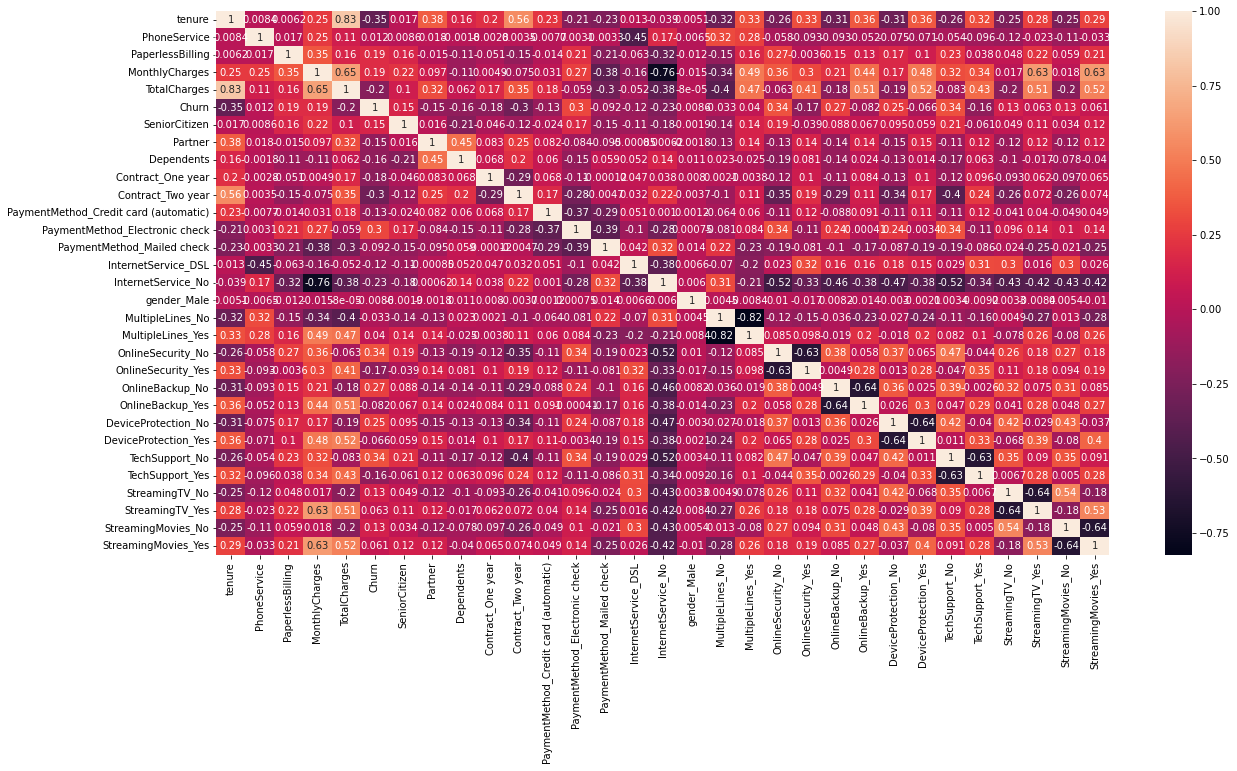

In [60]:
#Using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(), annot=True)
plt.show()

In [61]:
#Listing down highly correalated variables
corr_vars = ['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
             'StreamingTV_No','StreamingMovies_No']

<AxesSubplot:>

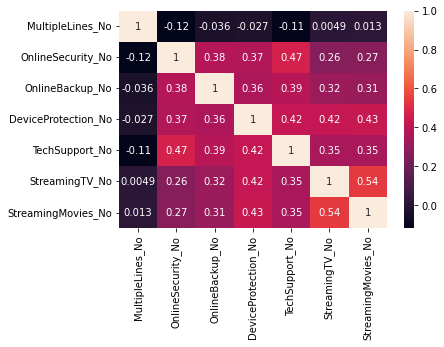

In [62]:
sns.heatmap(telecom[corr_vars].corr(), annot=True)

In [63]:
#Dropping correlated features
X_train = X_train.drop(corr_vars, axis=1)
X_test = X_test.drop(corr_vars, axis=1)

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 877 to 5640
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4930 non-null   float64
 1   PhoneService                           4930 non-null   int64  
 2   PaperlessBilling                       4930 non-null   int64  
 3   MonthlyCharges                         4930 non-null   float64
 4   TotalCharges                           4930 non-null   float64
 5   SeniorCitizen                          4930 non-null   int64  
 6   Partner                                4930 non-null   int64  
 7   Dependents                             4930 non-null   int64  
 8   Contract_One year                      4930 non-null   uint8  
 9   Contract_Two year                      4930 non-null   uint8  
 10  PaymentMethod_Credit card (automatic)  4930 non-null   uint8  
 11  Pa

In [65]:
### For Review, check the correlation between similar dummy variables like between Yes_No

In [66]:
new_lst=[]
for x in telecom.columns:
    try:
        if x.split('_')[1] in ('Yes','No'):
            new_lst.append(x)
    except IndexError:
        pass

<AxesSubplot:>

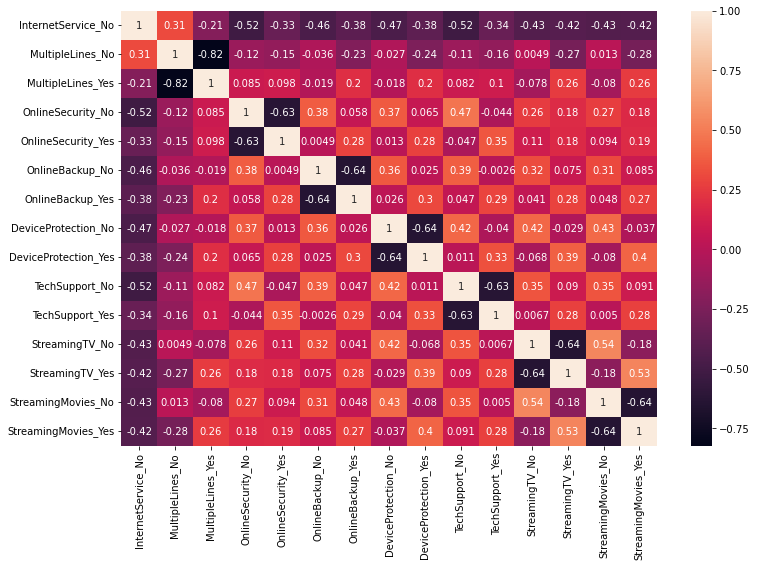

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(telecom[new_lst].corr(), annot=True)

- Here we can see all the similar yes_no pairs are highly correlated. Correlation is negative.
- Eg: MultipleLines_Yes and MultipleLines_No has correlation as -0.82. i.e high. Business perspective, customer can take Multiple lines or not take multiple lines, hence it is inversly related.

### Model Training 
- We will be using statsmodel as we need to see the statistics of model also, unlike sklearn Logistic Regression

In [70]:
import statsmodels.api as sm

In [71]:
#Add constant 
X_train_sm = sm.add_constant(X_train)

In [73]:
X_train_sm.head()

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_No,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
877,1.0,0.708333,0,0,0.417539,0.354898,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1
5792,1.0,0.208333,1,1,0.777778,0.164560,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1
5334,1.0,0.680556,1,1,0.893871,0.610512,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1
878,1.0,0.833333,1,0,0.463378,0.465912,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0
6578,1.0,0.138889,1,0,0.551071,0.079964,0,0,1,1,0,1,0,0,1,0,0,1,1,0,1,1,0,1


In [74]:
#Logistic Regression Model
logml = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

In [75]:
logml = logml.fit()

In [76]:
logml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Wed, 03 Aug 2022   Deviance:                       4016.1
Time:                        15:06:15   Pearson chi2:                 5.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.5455      1.245      2.044      0.041       0.104       4.987
tenure                                   -3.9388      0.525     -7.500      0.000      -4.968      -2.909
PhoneService                              0.4097      0.786      0.521      0.602      -1.131       1.950
PaperlessBilling                          0.3453      0.090      3.828      0.000       0.169       0.522
MonthlyCharges                           -5.0975      3.863     -1.320      0.187     -12.669       2.474
TotalCharges                              2.3371      0.727      3.215      0.001       0.912       3.762
SeniorCitizen                             0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
Contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
Contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
PaymentMethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
PaymentMethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
PaymentMethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
InternetService_DSL                      -2.0221      0.967     -2.091      0.037      -3.917      -0.127
InternetService_No                       -4.2015      1.930     -2.177      0.029      -7.984      -0.419
gender_Male                              -0.0411      0.078     -0.525      0.600      -0.195       0.112
MultipleLines_Yes                         0.5539      0.215      2.577      0.010       0.133       0.975
OnlineSecurity_Yes                       -0.0429      0.217     -0.198      0.843      -0.467       0.382
OnlineBackup_Yes                         -0.0206      0.211     -0.097      0.922      -0.435       0.394
DeviceProtection_Yes                      0.2014      0.213      0.944      0.345      -0.217       0.620
TechSupport_Yes                          -0.2538      0.219     -1.159      0.247      -0.683       0.175
StreamingTV_Yes                           0.7001      0.397      1.764      0.078      -0.078       1.478
StreamingMovies_Yes                       0.6689      0.396      1.688      0.091      -0.108       1.445
=========================================================================================================
"""

- Observations on Features for modelling
    1. Considering the P-values, there are many features which are still insignificant. 
    2. Some of the coefficient are negative, which is fine.
- Therefore, we have to further eleminate insignificant features.
    1. First by using Automated approach,i.e. **RFE (Recursive Feature Elimination )** - Top 15 Features
    2. Manual approach